# Part 1: Exploratory Data Analysis and Data Preprocessing
Welcome! In this notebook, I will guide you through the preparatory steps that I performed before getting down to building the actual model behind Predicting House Prices. The preparation consisted of two key phases: Exploratory Data Analysis (EDA) and Data Preprocessing.

**Exploratory Data Analysis (EDA)**

It is always essential for a data science project that we first put in great effort into understanding the data that we have at hand.

For this project, we are using [Kaggle's House Prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). This dataset contains "79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa." Our challenge is to predict the market price of each home. Since we attempt to predict a continuous number (price), this is a **regression problem**.

Our Exploratory Data Analysis will cover the below steps:

1. Setup (importing libraries & dataset)
2. Feature analysis:
    * Univariate analysis of dependent variable
    * Multivariate analysis

Note: As we are building a model to power a web app (and not as a solution for the competition), we will only use Kaggle's training dataset and will split that into training and testing datasets. Thus we will limit the EDA, too, to Kaggle's training dataset only.

*Credit: Pedro Marcelino's 'Comprehensive data exploration with Python' [notebook](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) served as a great inspiration for the EDA part of this notebook.*

**Data Preprocessing**

This is a must part of any data science project. We need to make sure that our data is ready for model building. This generally means four things: no missing data, no outliers or garbage data, encoded categorical variables, and scaled features.

However, for this project, we will build a tree-based linear regression model (XGBRegressor), which is (1) insesitive to outliers, and (2) does not require feature scaling. Consquently, we will neither clean our data from outliers, nor scale our features. 

This leaves us with the following preprocessing tasks:

1. Cleaning up missing data
2. Encoding categorical values

Alright, let's begin at the beginning by exploring our Housing Prices data.

# Exploratory Data Analysis (EDA)

## 1. Setup

OK, let's gets started! First, we will import all the libraries that we will use in our analysis:
* `numpy` for linear algebra
* `pandas` for data processing
* a few `scipy.stats` functions for statistical analysis
* `matplotlib.pyplot` and `seaborn` for visualization

We will also set `matplotlib`'s global parameters and `seaborn`'s color codes upfront so that our visualizations look nicer.

In [1]:
# import libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# ensure plots appear within notebook
%matplotlib inline

# set figures' size
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 4)

# this makes our colors nicer
sns.set(color_codes=True)

Next, we import the dataset that I downloaded from Kaggle, and have a quick peek inside. But before that, have a look at Kaggle's description of what data fields it contains. (It's a long list, so you might be better off if you just skim through it.)

> Here's a brief version of what you'll find in the data description file.
> 
> * **SalePrice:** The property's sale price in dollars. This is the target variable that you're trying to predict.

> * **MSSubClass:** The building class

> * **MSZoning:** The general zoning classification

> * **LotFrontage:** Linear feet of street connected to property

> * **LotArea:** Lot size in square feet

> * **Street:** Type of road access

> * **Alley:** Type of alley access

> * **LotShape:** General shape of property

> * **LandContour:** Flatness of the property

> * **Utilities:** Type of utilities available

> * **LotConfig:** Lot configuration

> * **LandSlope:** Slope of property

> * **Neighborhood:** Physical locations within Ames city limits

> * **Condition1:** Proximity to main road or railroad

> * **Condition2:** Proximity to main road or railroad (if a second is present)

> * **BldgType:** Type of dwelling

> * **HouseStyle:** Style of dwelling

> * **OverallQual:** Overall material and finish quality

> * **OverallCond:** Overall condition rating

> * **YearBuilt:** Original construction date

> * **YearRemodAdd:** Remodel date

> * **RoofStyle:** Type of roof

> * **RoofMatl:** Roof material

> * **Exterior1st:** Exterior covering on house

> * **Exterior2nd:** Exterior covering on house (if more than one material)

> * **MasVnrType:** Masonry veneer type

> * **MasVnrArea:** Masonry veneer area in square feet

> * **ExterQual:** Exterior material quality

> * **ExterCond:** Present condition of the material on the exterior

> * **Foundation:** Type of foundation

> * **BsmtQual:** Height of the basement

> * **BsmtCond:** General condition of the basement

> * **BsmtExposure:** Walkout or garden level basement walls

> * **BsmtFinType1:** Quality of basement finished area

> * **BsmtFinSF1:** Type 1 finished square feet

> * **BsmtFinType2:** Quality of second finished area (if present)

> * **BsmtFinSF2:** Type 2 finished square feet

> * **BsmtUnfSF:** Unfinished square feet of basement area

> * **TotalBsmtSF:** Total square feet of basement area

> * **Heating:** Type of heating

> * **HeatingQC:** Heating quality and condition

> * **CentralAir:** Central air conditioning

> * **Electrical:** Electrical system

> * **1stFlrSF:** First Floor square feet

> * **2ndFlrSF:** Second floor square feet

> * **LowQualFinSF:** Low quality finished square feet (all floors)

> * **GrLivArea:** Above grade (ground) living area square feet

> * **BsmtFullBath:** Basement full bathrooms

> * **BsmtHalfBath:** Basement half bathrooms

> * **FullBath:** Full bathrooms above grade

> * **HalfBath:** Half baths above grade

> * **Bedroom:** Number of bedrooms above basement level

> * **Kitchen:** Number of kitchens

> * **KitchenQual:** Kitchen quality

> * **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

> * **Functional:** Home functionality rating

> * **Fireplaces:** Number of fireplaces

> * **FireplaceQu:** Fireplace quality

> * **GarageType:** Garage location

> * **GarageYrBlt:** Year garage was built

> * **GarageFinish:** Interior finish of the garage

> * **GarageCars:** Size of garage in car capacity

> * **GarageArea:** Size of garage in square feet

> * **GarageQual:** Garage quality

> * **GarageCond:** Garage condition

> * **PavedDrive:** Paved driveway

> * **WoodDeckSF:** Wood deck area in square feet

> * **OpenPorchSF:** Open porch area in square feet

> * **EnclosedPorch:** Enclosed porch area in square feet

> * **3SsnPorch:** Three season porch area in square feet

> * **ScreenPorch:** Screen porch area in square feet

> * **PoolArea:** Pool area in square feet

> * **PoolQC:** Pool quality

> * **Fence:** Fence quality

> * **MiscFeature:** Miscellaneous feature not covered in other categories

> * **MiscVal:** USD value of miscellaneous feature

> * **MoSold:** Month Sold

> * **YrSold:** Year Sold

> * **SaleType:** Type of sale

> * **SaleCondition:** Condition of sale

In [2]:
# import dataset
data = pd.read_csv('../input/train.csv')

# peek into dataset
print('The dataset has {} rows and {} columns.\n'.format(data.shape[0], data.shape[1]))
data.head()

The dataset has 1460 rows and 81 columns.



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


That's quite a size with a lot of features. And you can spot SalePrice, our target variable, waving at us from the very last column. We will get to it soon enough...

The dataset might seem overwhelming at first, but don't worry, we will wrap our head around it by exploring its features in more detail in the next section.

But before we jump into that, let's first drop the Id column. As this is a random number for each observation, it has none predicting power, and thus should be eliminated from our model.

In [3]:
data = data.drop(labels = ['Id'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There, that's better.

## 2. Feature analysis

And the real data exploration begins now. We will approach this as follows:
* First, we will focus on our target variable (SalePrice) only. Geekly speaking, we will perform a univariate analysis of the dependent variable.
* Then, we will include all other variables (i.e. the independent variables) in our analysis as well. This is the so-called multivariate analysis, which we will use to understand the relations among all variables.

Let's begin. The first suspect shall be thee, SalePrice!

### Univariate analysis of the dependent variable, SalePrice

Let's explore what there is to know about SalePrice. To start with, are there any missing values that we should impute? And is it of the right data type?

In [4]:
print('Number of missing SalePrice values in dataset: {}'.format(data['SalePrice'].isnull().sum()))
if data['SalePrice'].isnull().sum() == 0:
    print('Yay, no missing values!')
print('\nData type of SalePrice: {}'.format(data.SalePrice.dtype))

Number of missing SalePrice values in dataset: 0
Yay, no missing values!

Data type of SalePrice: int64


No missing value here, SalePrice is all complete. Also, it is of type integer, which is equally a relief. No need to drop any rows / imput any values just yet.

OK, now what about SalePrice's basic statistics? `describe()` will tell us.

In [5]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So SalePrice has a mean of USD ~180k and a standard deviation of USD ~80k. The lowest value is USD ~ 35k (cheap, I say), while the most expensive house costs an outrageous USD 755k.

Next up: probability distribution. What does it look like for SalePrice? Seaborn will show us in a nice way.

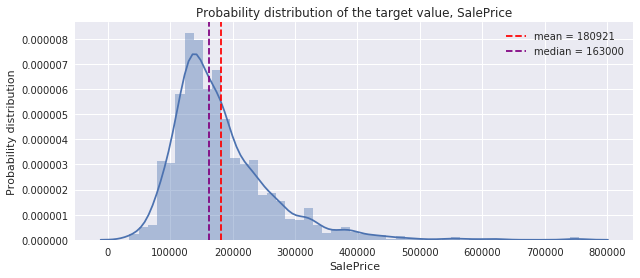

In [6]:
# plot target var SalePrice's probability distribution
sns.distplot(data.SalePrice)
plt.axvline(data['SalePrice'].mean(), ymin = 0, ymax = 1, label = 'mean = {:.0f}'.format(data['SalePrice'].mean()), color = 'red', ls = 'dashed')
plt.axvline(data['SalePrice'].median(), ymin = 0, ymax = 1, label = 'median = {:.0f}'.format(data['SalePrice'].median()), color = 'purple', ls = 'dashed')
plt.legend()
plt.ylabel('Probability distribution')
plt.title('Probability distribution of the target value, SalePrice')
plt.show()

We can infer from the histogram that SalePrice shows peakedness and right skewness. But by how much? See below.

In [7]:
# kurtosis and skewness
print('SalePrice\'s kurtosis is: {:.2f}'.format(data['SalePrice'].kurt()))
print('SalePrice\'s skewness is: {:.2f}'.format(data['SalePrice'].skew()))

SalePrice's kurtosis is: 6.54
SalePrice's skewness is: 1.88


The kurtosis of 6.54 is rather high, while the 1.88 skewness is on the borderline of being acceptable. If we were to use multiple linear regression we would want to carry out a log transformation of SalePrice to ensure that the residuals are normally distributed, but since we are using a tree-based model, there is no need for that: tress don't care whether or not the data is normally distributed.

### Multivariate analysis

In this part of our analysis we will identify the most relevant independent variables based on their relationship to SalePrice and each other. We should also take note of any multicollinearity, which can harm our model later, and should therefore be eliminated.

Let's look at the relationship between the variables using a **heatmap** of correlation values.

Drawing correlation heatmaps serves two purposes:
1. To identify **potential multicollinearity** between independent variables (by looking at all correlations across the dataset)
2. To pinpoint features that show the **highest correlation with SalePrice** - we will zoom in on these

#### Check for multicollinearity
Ok, so first, let's look for potential multicollinearity between independent variables.

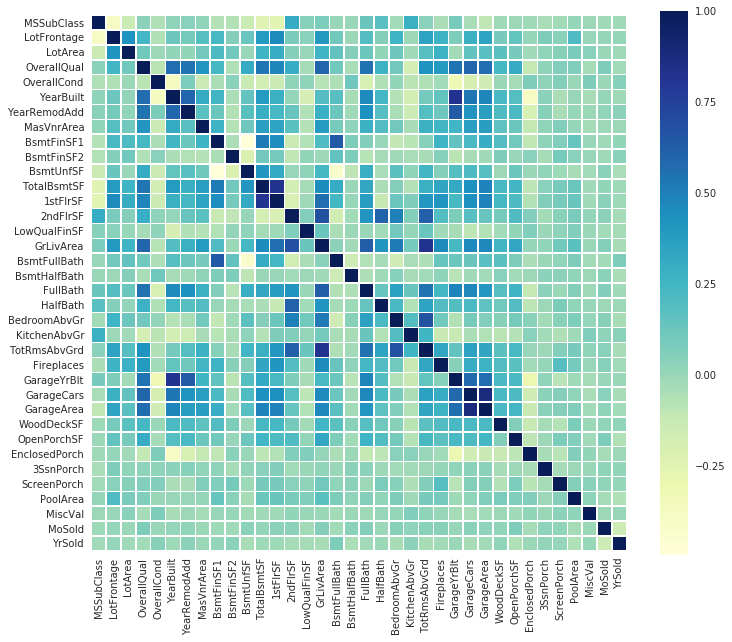

In [8]:
# correlation matrix of independent variables, i.e. excluding SalePrice
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix.iloc[:-1, :-1], square = True, linewidths=.5, cmap="YlGnBu")

Cases of high correlations (above 0.8 and below -0.8) might indicate multicollinearity. From the heatmap, it seems that there are no variables that show high negative correlation.
But let's sanity check.

In [9]:
# check for high negative correlation
print ('Number of correlations below -0.8:\n', np.sum(corr_matrix[corr_matrix < -0.8].count()))

Number of correlations below -0.8:
 0


Great, we have a good eye for yellow!

However, there are quite a few dark blue squares indicating high positive correlation:
* TotalBsmtSF vs. 1stFlrSF (Total square feet of basement area vs. First Floor square feet)
* GarageCars vs. GarageArea (Size of garage in car capacity vs. Size of garage in square feet)
* YearBuilt vs. GarageYrBlt (Original construction date vs. Year garage was built)
* GrLivArea vs. TotRmsAbvGrd (Above grade (ground) living area square feet vs. Total rooms above grade (does not include bathrooms))

But let's check whether there are any other highly correlated value pairs.

In [10]:
# check for high positive correlation
for i in corr_matrix.columns:
    for j in corr_matrix[i]:
        if j > 0.8 and j < 1.0:
            print('Correlation of {:.3f} between {} and {}'.format(j, i, corr_matrix[corr_matrix[i] == j].index.values[0]))

Correlation of 0.826 between YearBuilt and GarageYrBlt
Correlation of 0.820 between TotalBsmtSF and 1stFlrSF
Correlation of 0.820 between 1stFlrSF and TotalBsmtSF
Correlation of 0.825 between GrLivArea and TotRmsAbvGrd
Correlation of 0.825 between TotRmsAbvGrd and GrLivArea
Correlation of 0.826 between GarageYrBlt and YearBuilt
Correlation of 0.882 between GarageCars and GarageArea
Correlation of 0.882 between GarageArea and GarageCars


No new suspects besides the already spotted four pairs. Let's zoom in on these.

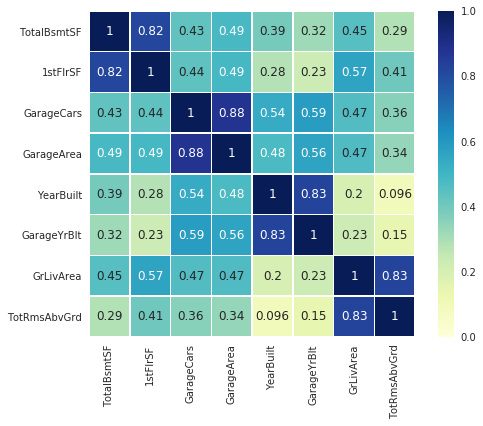

In [11]:
# zoomed in correlation matrix to analyze multicollinearity
fig, ax = plt.subplots(figsize = (8, 6))
multicollin_corr_matrix = data[['TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'GarageYrBlt', 'GrLivArea', 'TotRmsAbvGrd']].corr()
sns.heatmap(multicollin_corr_matrix, vmin = .0, square = True, linewidths=.5, cmap="YlGnBu", annot = True)

Each of these four variable pairs shows a strong correlation of above 0.8. If we think about them for a moment, it is indeed common sense that they have a strong connection:
* TotalBsmtSF vs. 1stFlrSF: The total square feet of the basement area and the first floor should indeed be pretty close to each other
* GarageCars vs. GarageArea: These values basically say the same thing with different metrics
* YearBuilt vs. GarageYrBlt: Again, the construction date of the house should be around the same time as that of the garage, if all went well...
* GrLivArea vs. TotRmsAbvGrd: It is also quite logical that the above grade living area and the total number of rooms above grade  strongly correlate

Members of these variable pairs are basically saying the same things! They are multicollinear and thus do not add additional information that is not already provided to our model by their counterpart. As a result, it is wisest if we only keep one member of each of these pairs.

But which variable should we drop from each of these pairs? My hypothesis is that:
* 1stFlrSF (first floor square feet) is more important to customers than TotalBsmtSF (total square feet of basement area)
* GarageCars (size of garage in car capacity) is more important than GarageArea (size of garage in square feet)
* And YearBuilt (original construction date) prevails over GarageYrBlt  (year garage was built)
*  GrLivArea (above grade living area) comes before TotRmsAbvGrd (total number of rooms above grade) in the customers' eyes

But let's see their actual correlations with SalePrice to decide this.

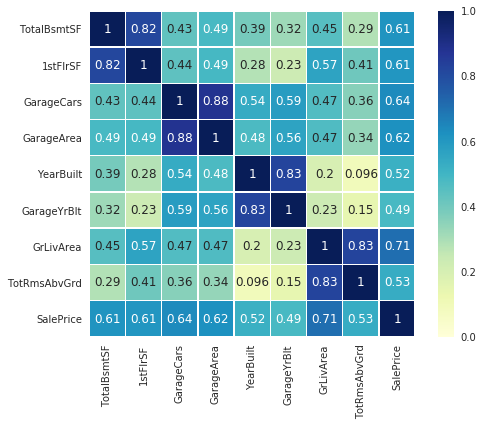

In [12]:
# correlation matrix between multicollinear value pairs and SalePrice
fig, ax = plt.subplots(figsize = (8, 6))
multicollin_corr_matrix2 = data[['TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'GarageYrBlt', 'GrLivArea', 'TotRmsAbvGrd', 'SalePrice']].corr()
sns.heatmap(multicollin_corr_matrix2, vmin = .0, square = True, linewidths=.5, cmap="YlGnBu", annot = True)

And the winners are:
* TotalBsmtSF and 1stFlrSF finished the competition in a tie (0.61)
* GarageCars shows a slightly better correlation with SalePrice than GarageArea (0.64 vs. 0.62)
* YearBuilt is a tiny bit more important to customers than GarageYrBlt (0.52 vs 0.49)
* GrLivArea is much more valuable to customers than TotRmsAbvGrd (0.71 vs 0.53)

Thus, as an act of anticipatory feature selection, we will keep 1stFlrSF (arbitrarily), GarageCars, YearBuilt, and GrLiveArea, while drop TotalBsmtSF, GarageArea, GarageYrBlt, and TotRmsAbvGrd.

In [13]:
# drop TotalBsmtSF, GarageArea, GarageYrBlt, TotRmsAbvGrd
data = data.drop(labels = ['TotalBsmtSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Independent variables with the highest relevance
Now let's see which independent variables show the highest correlation to SalePrice. In fact, let's only look at correlations above 0.5 or below -0.5.

In [14]:
# get independent variables with an absolute correlation greater than 0.5 to SalePrice
corr_matrix2 = data.corr()
corr_matrix3 = corr_matrix2[corr_matrix2.abs()['SalePrice'] > 0.5].sort_values('SalePrice', ascending = False)
selected_features = corr_matrix3['SalePrice']
print('SalePrice\'s top correlating features are: \n\n', selected_features[1:])

SalePrice's top correlating features are: 

 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
1stFlrSF        0.605852
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


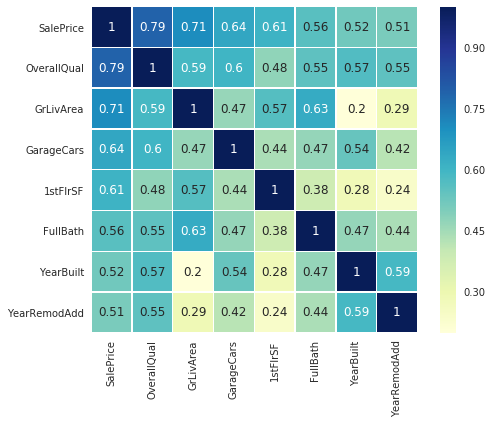

In [15]:
# draw zoomed in heatmap
selected_df = data[selected_features.index]
cmatrix = selected_df.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(cmatrix, square = True, annot = True, linewidths=.5, cmap="YlGnBu", yticklabels = selected_features.index, xticklabels = selected_features.index)
plt.show()

So these features are our best SalePrice predictors at first sight. But we will only reach the final verdict as a result of our feature selection, which we will carry out in Part 2. Even so, let's look at these features' relationship with SalePrice more closely with scatter plots.

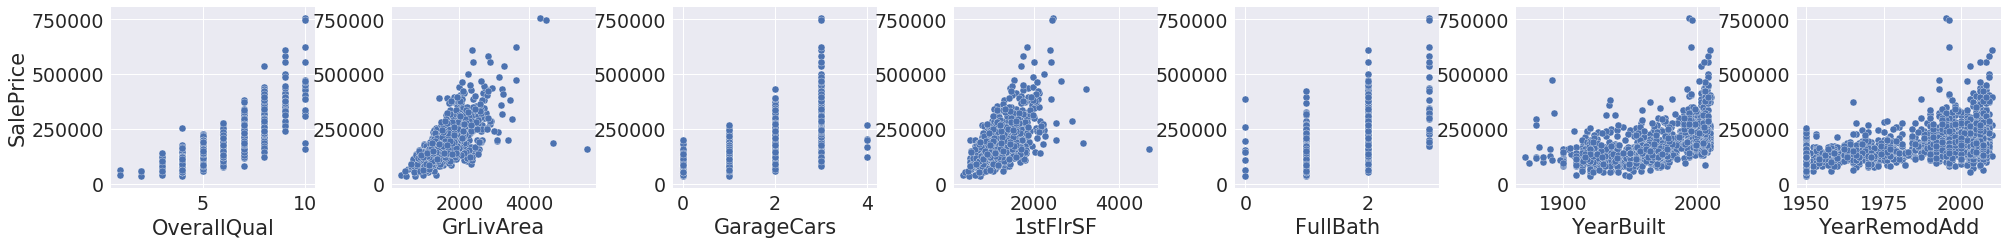

In [16]:
# scatter plot
sns.set(font_scale = 1.9)
sns.pairplot(data, x_vars = selected_features.index[1:], y_vars = 'SalePrice', size = 4)
plt.show()

From the above plots we can see that most of these features have outliers. Moreover, GrLivArea and 1stFlrSF show [heteroscedasticity](http://en.wikipedia.org/wiki/Heteroscedasticity) instead of homoscedasticity, which is problematic for linear regression. But luckily, xgboost doesn't care about this! So we don't need to transform the data by any means (e.g. log transformation) to normalize its distribution. As for the outliers, thanks to using an ensemble tree, we can also just forget about them. Good stuff.

# Data preprocessing

## 1. Cleaning up missing data
Now, let's clean some data. How many missing values are there for each variable, again?

In [17]:
# features with missing values
print(data.columns[data.isnull().sum() > 0])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [18]:
# count missing values
missing_feat = data.columns[data.isnull().sum() > 0].values
data[missing_feat].isnull().sum().sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Four are standing out in magnitude (80-100% of dataset): PoolQC (pool quality), MiscFeature (miscellaneous feature not covered in other categories), Alley (type of alley access), and Fence (fence quality). First, none of these seem to me to be of outmost importance to a customer when buying a house. Second, as we will be building a web app that collects user input about house parameters, our goal is to arrive at a final set of 4-6 predictors. For these reasons, we can simply drop these four features.

In [19]:
# drop features with highest number of missing values
data = data.drop(labels = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

Next two features are FireplaceQu (fireplace quality) and LotFrontage (linear feet of street connected to property). To me, these two features fall into the same category as the above four: we are better off by dropping them.

In [20]:
# drop additional features
data = data.drop(labels = ['FireplaceQu', 'LotFrontage'], axis = 1)

One more thing, the bottom three features from the missing features list (MasVnrArea, MasVnrType, Electrical) have only a few missing values. Also, the missing values for MasVnrArea and MasVnrType (masonry veneer area and type) most certainly overlap. We can just drop this few rows from the dataset.

In [21]:
# drop rows
data = data.dropna(subset=['MasVnrArea', 'MasVnrType', 'Electrical'])

In [22]:
# update mimissing feature list
missing_feat = data.columns[data.isnull().sum() > 0].values

# count missing values
data[missing_feat].isnull().sum().sort_values(ascending = False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
dtype: int64

This leaves us with nine features with missing values. Let's look into these.

In [23]:
data[missing_feat].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,Attchd,RFn,TA,TA


All of these are categorical variables. As the number of missing values only represent 2-6% of our dataset we can safely impute them using the most frequent not-NaN value.

In [24]:
# most frequent unique values in missing features
for col in data[missing_feat]:
    print(col,"\n", data[col].value_counts(), "\n")

BsmtQual 
 TA    648
Gd    611
Ex    120
Fa     35
Name: BsmtQual, dtype: int64 

BsmtCond 
 TA    1303
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

BsmtExposure 
 No    945
Av    221
Gd    133
Mn    114
Name: BsmtExposure, dtype: int64 

BsmtFinType1 
 Unf    427
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
Name: BsmtFinType1, dtype: int64 

BsmtFinType2 
 Unf    1247
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

GarageType 
 Attchd     863
Detchd     387
BuiltIn     86
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

GarageFinish 
 Unf    605
RFn    418
Fin    347
Name: GarageFinish, dtype: int64 

GarageQual 
 TA    1302
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64 

GarageCond 
 TA    1317
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 



Result:
* Four features (BsmtQual, BsmtCond, GarageQual, GarageCond) have 'TA' as their most frequent value
* Three features (BsmtFinType1, BsmtFinType2, GarageFinish) have 'Unf' as their most frequent value
* BsmtExposure's most frequent value is 'No'
* GarageType's most frequent values is 'Attchd'

Let's use these to impute the missing values.

In [25]:
# prepare dict for pandas' fillna() value parameter
value_dict = {
    'BsmtQual': 'TA', 'BsmtCond': 'TA', 'GarageQual': 'TA', 'GarageCond': 'TA',
    'BsmtFinType1': 'Unf', 'BsmtFinType2': 'Unf', 'GarageFinish': 'Unf',
    'BsmtExposure': 'No',
    'GarageType': 'Attchd'
}

# replace missing values
data = data.fillna(value = value_dict)

In [26]:
# check success
print ("The dataset has {} missing values.".format(np.sum(data.isnull().sum())))

The dataset has 0 missing values.


Yay! We are done with missing data. Next up: encoding categorical variables.

## 2. Encoding categorical values 

First, let's identify those features that are categorical and contain string values. These will be the ones that we will need to encode.

In [27]:
# get categorical columns with dtype string by excluding numerical columns from dataframe
num_cols = data._get_numeric_data().columns
strcat_cols = list(set(data.columns) - set(num_cols))
print(strcat_cols)

['PavedDrive', 'GarageType', 'SaleType', 'Exterior1st', 'MasVnrType', 'Foundation', 'RoofMatl', 'GarageQual', 'KitchenQual', 'BsmtFinType1', 'LandContour', 'GarageFinish', 'RoofStyle', 'Electrical', 'BsmtCond', 'HeatingQC', 'Functional', 'BsmtFinType2', 'MSZoning', 'Exterior2nd', 'BldgType', 'SaleCondition', 'Utilities', 'HouseStyle', 'GarageCond', 'Neighborhood', 'ExterQual', 'Street', 'BsmtExposure', 'LotConfig', 'Heating', 'LotShape', 'LandSlope', 'CentralAir', 'ExterCond', 'Condition1', 'BsmtQual', 'Condition2']


Now that we have these columns, we can encode their string values with dummy variables using  pandas' `get_dummies()` function. As a great new feature it now also has a parameter, `drop_first`, to help us avoid the [dummy variable trap](http://www.algosome.com/articles/dummy-variable-trap-regression.html).

In [28]:
data = pd.get_dummies(data, prefix=strcat_cols, columns=strcat_cols, drop_first=True)

With that, we took care of our categorical values of type string. What about numerical categorical data? Let's see what we have here.

32


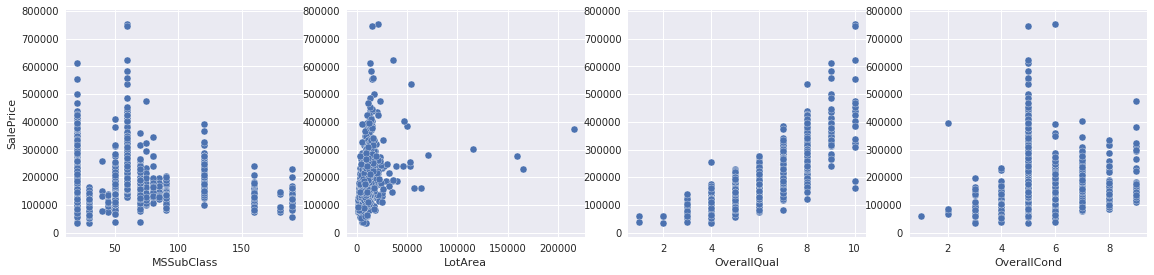

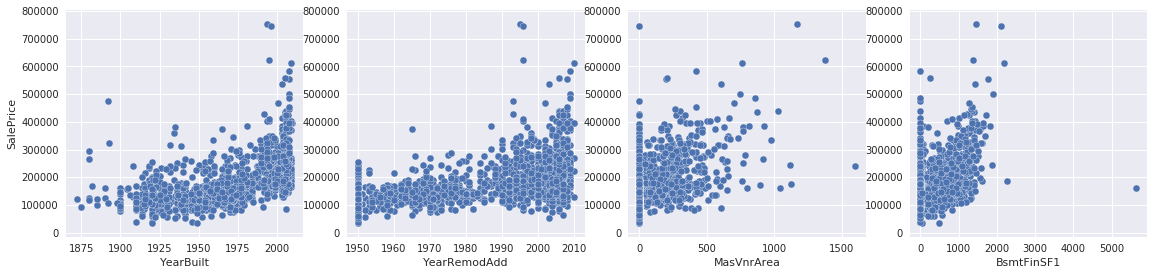

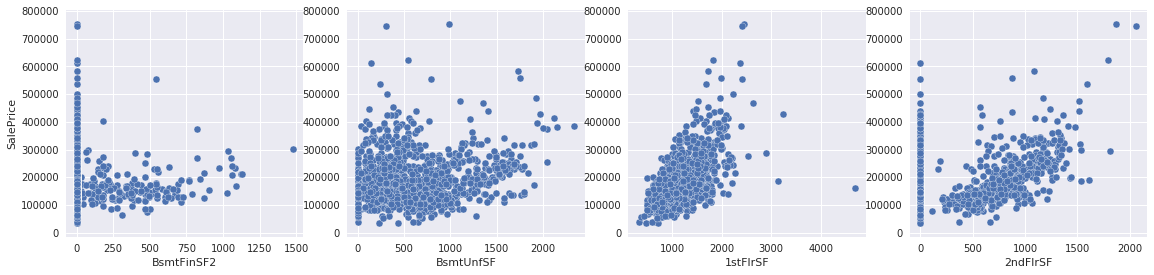

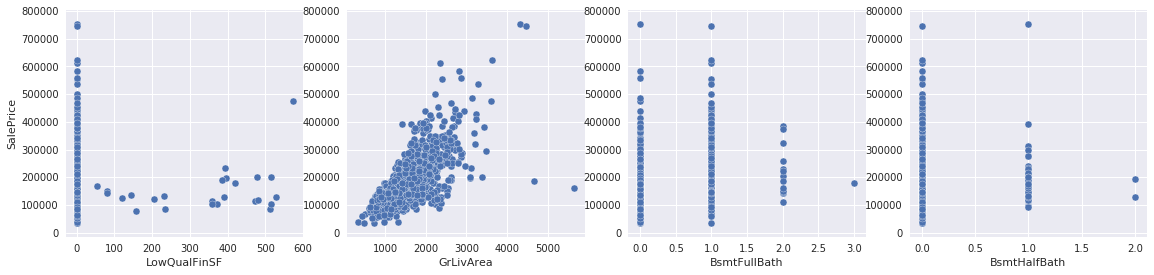

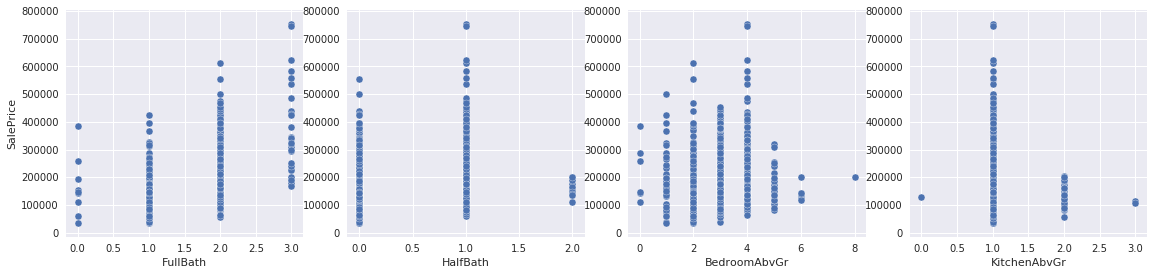

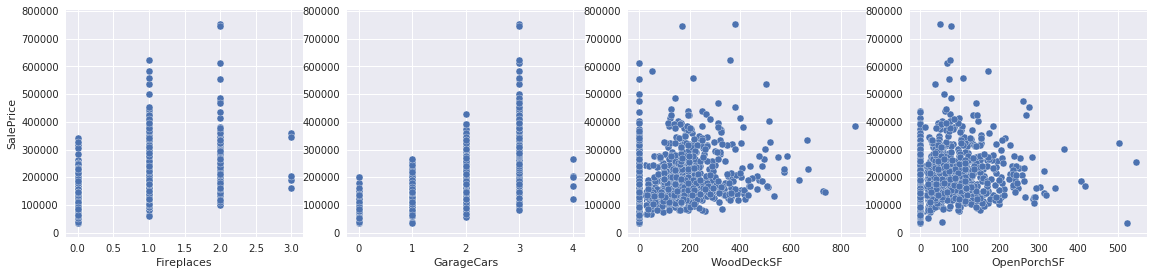

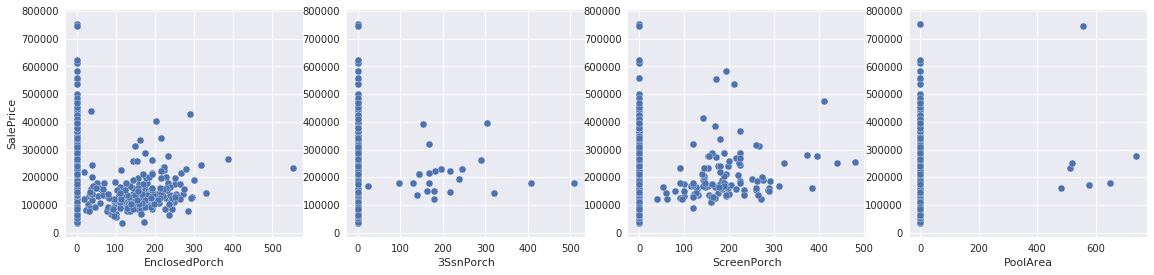

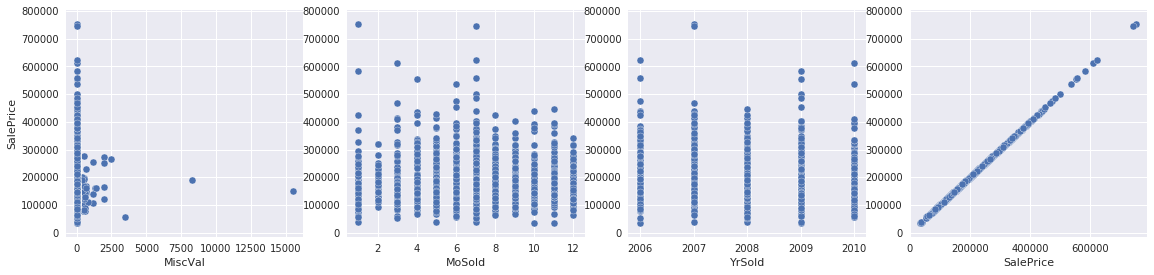

In [29]:
# scatter plot num_cols to identify numerical categorical data
print(len(num_cols))

# font scale
sns.set(font_scale = 1)

# for loop to wrap pairplots
j = 0
for i in range(4, 33, 4): # 33 because we don't need to plot the 33rd feature, which is SalePrice itself
    sns.pairplot(data, x_vars = num_cols[j:i], y_vars = 'SalePrice', size = 4)
    j = i
plt.show()

From this we see the following numeric categorical variables:
* OverallQual
* OverallCond
* BsmtFullBath
* BsmtHalfBath
* FullBath
* HalfBath
* BedroomAbvGr
* KitchenAbvGr
* Fireplaces
* GarageCars
* MoSold
* YrSold

Let's put these column names in a list and dummy encode them as well.

In [30]:
# list for numerical categorical features
numcat_cols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

# dummy encoding
data = pd.get_dummies(data, prefix=numcat_cols, columns=numcat_cols, drop_first=True)

And that's it for the data encoding part. With this we are done with Part 1! Let's save our preprocessed dataset and continue to Part 2: Model Building.

In [31]:
data.to_csv('dataset.csv', index=False)